![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions. This data does contain null values and some outliers, but handling these is out of scope for the project. Feel free to experiment after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

![separator2](https://i.imgur.com/4gX5WFr.png)

## Step 0: Imports and Reading Data

In [1]:
# Importing pandas and matplotlib
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


# Start coding!
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
%matplotlib inline

In [3]:
netflix_df = pd.read_csv('netflix_data.csv', header=0, index_col=0, sep=',',dtype={"release_year":str})
netflix_df

,type,title,director,cast,country,date_added,release_year,duration,description,genre
show_id,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
...,...,...,...,...,...,...,...,...,...,...
s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas
s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,111,A scrappy but poor boy worms his way into a ty...,Dramas
s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,44,"In this documentary, South African rapper Nast...",Documentaries


In [4]:
netflix_df['date_added'] = netflix_df['date_added'].str.strip()
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], format='%B %d, %Y')
netflix_df

,type,title,director,cast,country,date_added,release_year,duration,description,genre
show_id,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,4,In a future where the elite inhabit an island ...,International TV
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,123,A brilliant group of students become card-coun...,Dramas
...,...,...,...,...,...,...,...,...,...,...
s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,2020-10-19,2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas
s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,111,A scrappy but poor boy worms his way into a ty...,Dramas
s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,2020-09-25,2019,44,"In this documentary, South African rapper Nast...",Documentaries


In [5]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, s1 to s7787
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          7787 non-null   object        
 1   title         7787 non-null   object        
 2   director      5398 non-null   object        
 3   cast          7069 non-null   object        
 4   country       7280 non-null   object        
 5   date_added    7777 non-null   datetime64[ns]
 6   release_year  7787 non-null   object        
 7   duration      7787 non-null   int64         
 8   description   7787 non-null   object        
 9   genre         7787 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 927.2+ KB


In [6]:
netflix_df.head(15)

,type,title,director,cast,country,date_added,release_year,duration,description,genre
show_id,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,4,In a future where the elite inhabit an island ...,International TV
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,123,A brilliant group of students become card-coun...,Dramas
s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,1,A genetics professor experiments with a treatm...,International TV
s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,95,"After an awful accident, a couple admitted to ...",Horror Movies
s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,1997,119,After one of his high school students attacks ...,Dramas
s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,2019-04-01,2019,118,"When a doctor goes missing, his psychiatrist w...",Horror Movies


In [7]:
netflix_df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, s1 to s7787
Columns: 10 entries, type to genre
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 927.2+ KB


In [8]:
netflix_df.shape[0]

7787

In [9]:
netflix_df[['duration']].describe()

,duration
count,7787.00
mean,69.12
std,50.95
min,1.00
25%,2.00
50%,88.00
75%,106.00
max,312.00


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Step 1: Data Preperation

In [10]:
netflix_df.head(5)

,type,title,director,cast,country,date_added,release_year,duration,description,genre
show_id,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,4,In a future where the elite inhabit an island ...,International TV
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,123,A brilliant group of students become card-coun...,Dramas


In [11]:
netflix_df['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

In [12]:
netflix_subset = netflix_df.loc[netflix_df['type'] == 'Movie']
netflix_subset

,type,title,director,cast,country,date_added,release_year,duration,description,genre
show_id,,,,,,,,,,
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,123,A brilliant group of students become card-coun...,Dramas
s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,95,"After an awful accident, a couple admitted to ...",Horror Movies
...,...,...,...,...,...,...,...,...,...,...
s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,88,"Dragged from civilian life, a former superhero...",Children
s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,2020-10-19,2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas
s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,111,A scrappy but poor boy worms his way into a ty...,Dramas


In [13]:
netflix_subset.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'description', 'genre'],
      dtype='object')

In [14]:
netflix_movies = netflix_subset[['title','country','genre','release_year','duration']]
netflix_movies

,title,country,genre,release_year,duration
show_id,,,,,
s2,7:19,Mexico,Dramas,2016,93
s3,23:59,Singapore,Horror Movies,2011,78
s4,9,United States,Action,2009,80
s5,21,United States,Dramas,2008,123
s7,122,Egypt,Horror Movies,2019,95
...,...,...,...,...,...
s7782,Zoom,United States,Children,2006,88
s7783,Zozo,Sweden,Dramas,2005,99
s7784,Zubaan,India,Dramas,2015,111


In [15]:
short_movies = netflix_movies.loc[netflix_movies['duration'] < 60] 
short_movies

,title,country,genre,release_year,duration
show_id,,,,,
s36,#Rucker50,United States,Documentaries,2016,56
s56,100 Things to do Before High School,United States,Uncategorized,2014,44
s68,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
s102,3 Seconds Divorce,Canada,Documentaries,2018,53
s147,A 3 Minute Hug,Mexico,Documentaries,2019,28
...,...,...,...,...,...
s7680,WWII: Report from the Aleutians,United States,Documentaries,1943,45
s7693,Ya no estoy aquí: Una conversación entre Guill...,NaN,Documentaries,2020,15
s7719,Yoo Byung Jae: Discomfort Zone,South Korea,Stand-Up,2018,54


In [16]:
short_movies.duplicated().sum()

0

In [17]:
short_movies.isna().sum()

title            0
country         66
genre            0
release_year     0
duration         0
dtype: int64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Step 2: Feature Understanding

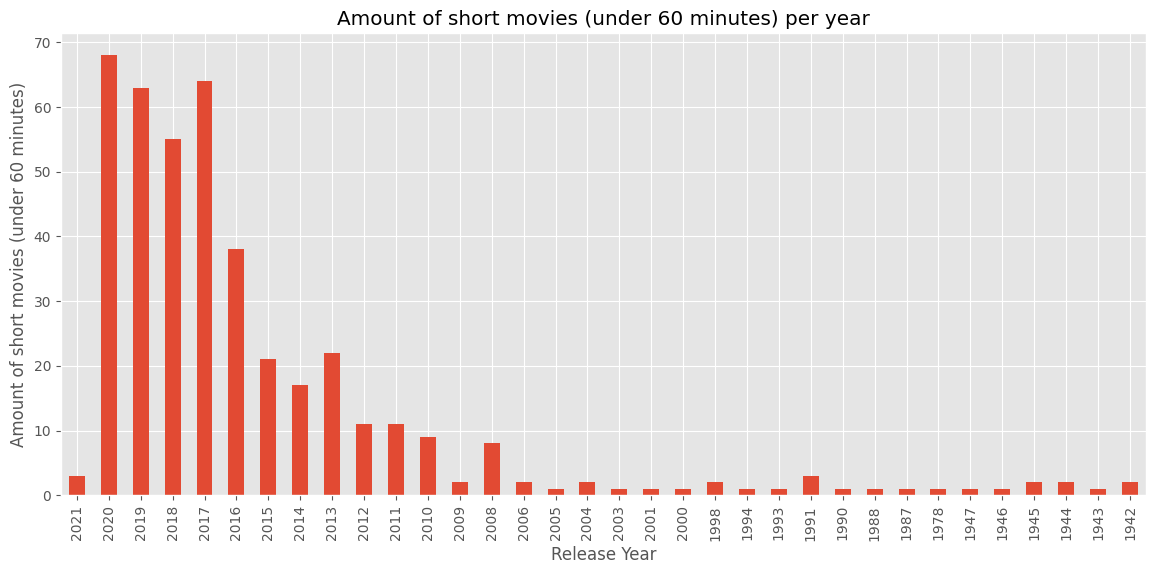

In [82]:
ax = short_movies['release_year'].value_counts().sort_index(ascending=False).plot(kind='bar',figsize=(14,6))
ax.set_xlabel("Release Year")
ax.set_ylabel("Amount of short movies (under 60 minutes)")
ax.set_title("Amount of short movies (under 60 minutes) per year")
plt.show()

In [108]:
short_movies_genre_counts = short_movies['genre'].value_counts()

In [109]:
short_movies_genre_counts_subset = short_movies_genre_counts[:'Classic Movies']
short_movies_genre_counts_subset['Other'] = short_movies_genre_counts['Action':].sum() 

In [110]:
short_movies_genre_counts_subset

genre
Documentaries     151
Children          107
Stand-Up           72
Uncategorized      40
Comedies           15
Dramas             12
Classic Movies      8
Other              15
Name: count, dtype: int64

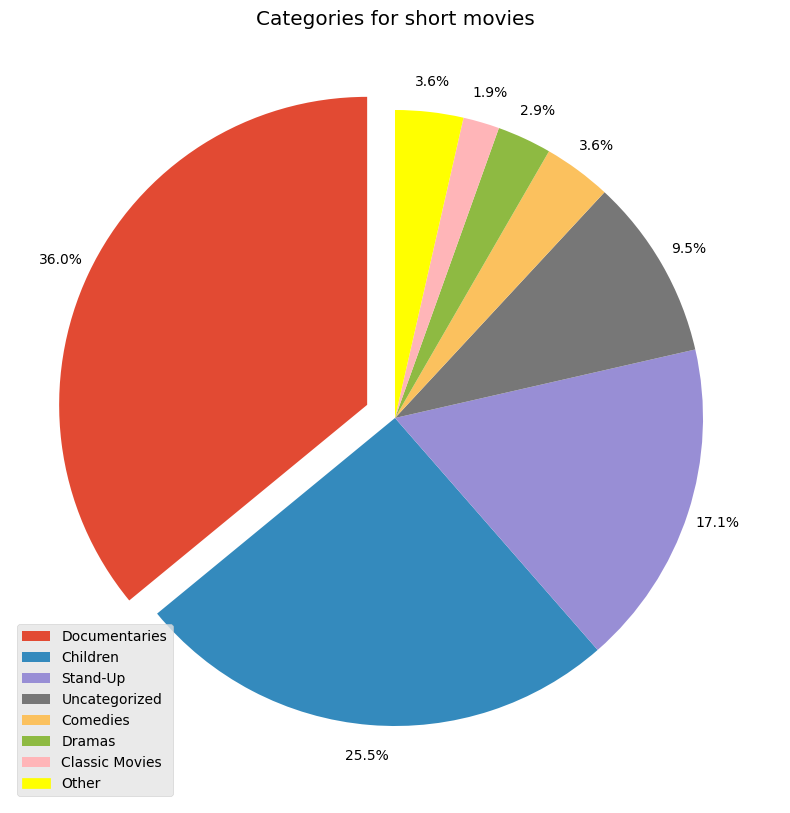

In [174]:
explosions = [0.1] + [0] * (len(short_movies_genre_counts_subset)-1)
ax = short_movies_genre_counts_subset.plot(kind='pie',explode=explosions, figsize=(20,10),startangle=90, autopct="%.1f%%",labels=None,pctdistance=1.1)
legend = ax.legend(labels=short_movies_genre_counts_subset.index,loc='lower left')
ax.patches[-1].set_facecolor('yellow')
ax.set_ylabel("")
ax.set_title("Categories for short movies")
handles1 = legend.legend_handles
handles1[-1].set_color('yellow')
colors = [patch.get_facecolor() for patch in ax.patches]
plt.show()

In [216]:
short_movies

,title,country,genre,release_year,duration
show_id,,,,,
s36,#Rucker50,United States,Documentaries,2016,56
s56,100 Things to do Before High School,United States,Uncategorized,2014,44
s68,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
s102,3 Seconds Divorce,Canada,Documentaries,2018,53
s147,A 3 Minute Hug,Mexico,Documentaries,2019,28
...,...,...,...,...,...
s7680,WWII: Report from the Aleutians,United States,Documentaries,1943,45
s7693,Ya no estoy aquí: Una conversación entre Guill...,NaN,Documentaries,2020,15
s7719,Yoo Byung Jae: Discomfort Zone,South Korea,Stand-Up,2018,54


In [217]:
proportion_of_short_docs_to_all_docs = "{:.2f}%".format((short_movies.loc[short_movies['genre'] == 'Documentaries'].shape[0] / netflix_movies.loc[netflix_movies['genre'] == 'Documentaries'].shape[0]) * 100)
print(proportion_of_short_docs_to_all_docs)

20.11%


In [218]:
proportion_of_short_childrenmovies_to_all_childrenmovies = "{:.2f}%".format((short_movies.loc[short_movies['genre'] == 'Children'].shape[0] / netflix_movies.loc[netflix_movies['genre'] == 'Children'].shape[0]) * 100) 
print(proportion_of_short_childrenmovies_to_all_childrenmovies)

21.31%


In [219]:
proportion_of_short_standups_to_all_standups = "{:.2f}%".format((short_movies.loc[short_movies['genre'] == 'Stand-Up'].shape[0] / netflix_movies.loc[netflix_movies['genre'] == 'Stand-Up'].shape[0])*100)
print(proportion_of_short_standups_to_all_standups)

22.43%


In [220]:
num_of_docs_per_year = netflix_movies.loc[netflix_movies['genre'] == 'Documentaries'].groupby(['release_year']).size()
num_of_docs_per_year

release_year
1943      2
1973      1
1977      1
1979      1
1980      1
1988      1
1990      1
1994      2
1998      1
2002      3
2004      1
2005      4
2006      2
2007      4
2008      4
2009      3
2010      8
2011      7
2012     11
2013     28
2014     28
2015     65
2016    133
2017    165
2018    116
2019     96
2020     57
2021      5
dtype: int64

In [221]:
num_of_short_docs_per_year = short_movies.loc[short_movies['genre'] == 'Documentaries'].groupby(['release_year']).size()
num_of_short_docs_per_year

release_year
1943     1
1994     1
2005     1
2006     1
2008     3
2010     3
2012     1
2013    10
2014     6
2015     7
2016    22
2017    35
2018    23
2019    19
2020    15
2021     3
dtype: int64

In [222]:
combined_series = pd.concat([num_of_docs_per_year, num_of_short_docs_per_year],axis=1)
combined_series.columns = ['Total_Docs_Released','Total_Short_Docs_Released']
combined_series['Total_Short_Docs_Released'] = combined_series['Total_Short_Docs_Released'].fillna(0)
combined_series

,Total_Docs_Released,Total_Short_Docs_Released
release_year,,
1943,2,1.00
1973,1,0.00
1977,1,0.00
1979,1,0.00
1980,1,0.00
1988,1,0.00
1990,1,0.00
1994,2,1.00
1998,1,0.00


In [223]:
combined_series['Ratio'] = combined_series['Total_Short_Docs_Released'] / combined_series['Total_Docs_Released']
combined_series

,Total_Docs_Released,Total_Short_Docs_Released,Ratio
release_year,,,
1943,2,1.00,0.50
1973,1,0.00,0.00
1977,1,0.00,0.00
1979,1,0.00,0.00
1980,1,0.00,0.00
1988,1,0.00,0.00
1990,1,0.00,0.00
1994,2,1.00,0.50
1998,1,0.00,0.00


C:\Users\abdal\AppData\Local\Temp\ipykernel_25424\2107844866.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(["{:.0f}%".format(x * 100) for x in plt.yticks()[0]])


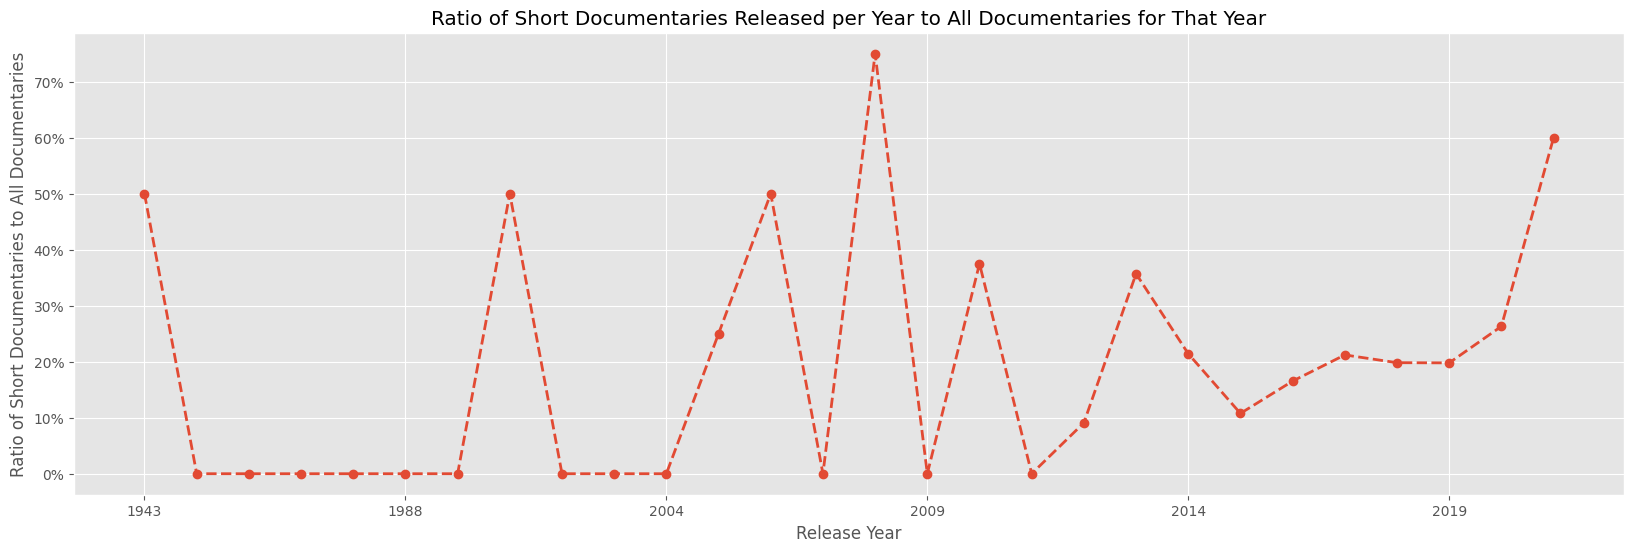

In [225]:
ax = combined_series['Ratio'].plot(figsize=(20,6),marker='o',linestyle='--',lw=2)
ax.set_xlabel("Release Year")
ax.set_ylabel("Ratio of Short Documentaries to All Documentaries")
ax.set_title("Ratio of Short Documentaries Released per Year to All Documentaries for That Year")
ax.set_yticklabels(["{:.0f}%".format(x * 100) for x in plt.yticks()[0]]) 
plt.show()

In [226]:
num_of_children_movies_per_year = netflix_movies.loc[netflix_movies['genre'] == 'Children'].groupby(['release_year']).size()
num_of_children_movies_per_year

release_year
1954     1
1968     1
1971     1
1973     1
1977     1
1978     1
1982     1
1986     1
1989     2
1991     3
1993     2
1994     1
1995     3
1997     1
1998     2
1999     3
2000     6
2001     4
2002     3
2003     6
2004     8
2005     6
2006     7
2007     9
2008     9
2009    12
2010    15
2011    22
2012    16
2013    24
2014    27
2015    18
2016    39
2017    45
2018    55
2019    69
2020    76
2021     1
dtype: int64

In [227]:
num_of_short_children_movies_per_year = short_movies.loc[short_movies['genre'] == 'Children'].groupby(['release_year']).size()
num_of_short_children_movies_per_year

release_year
1978     1
2003     1
2004     1
2008     1
2009     1
2010     3
2011     3
2012     5
2013     7
2014     3
2015     4
2016     6
2017     9
2018     9
2019    21
2020    32
dtype: int64

In [228]:
combined_series = pd.concat([num_of_children_movies_per_year,num_of_short_children_movies_per_year],axis=1)
combined_series.columns = ['Children_Movies_Released', 'Short_Children_Movies_Released']
combined_series['Short_Children_Movies_Released'] = combined_series['Short_Children_Movies_Released'].fillna(0)
combined_series

,Children_Movies_Released,Short_Children_Movies_Released
release_year,,
1954,1,0.00
1968,1,0.00
1971,1,0.00
1973,1,0.00
1977,1,0.00
1978,1,1.00
1982,1,0.00
1986,1,0.00
1989,2,0.00


In [229]:
combined_series['Ratio'] = (combined_series['Short_Children_Movies_Released'] / combined_series['Children_Movies_Released']) * 100
combined_series

,Children_Movies_Released,Short_Children_Movies_Released,Ratio
release_year,,,
1954,1,0.00,0.00
1968,1,0.00,0.00
1971,1,0.00,0.00
1973,1,0.00,0.00
1977,1,0.00,0.00
1978,1,1.00,100.00
1982,1,0.00,0.00
1986,1,0.00,0.00
1989,2,0.00,0.00


C:\Users\abdal\AppData\Local\Temp\ipykernel_25424\2857170006.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels("{:.0f}%".format(x) for x in plt.yticks()[0])


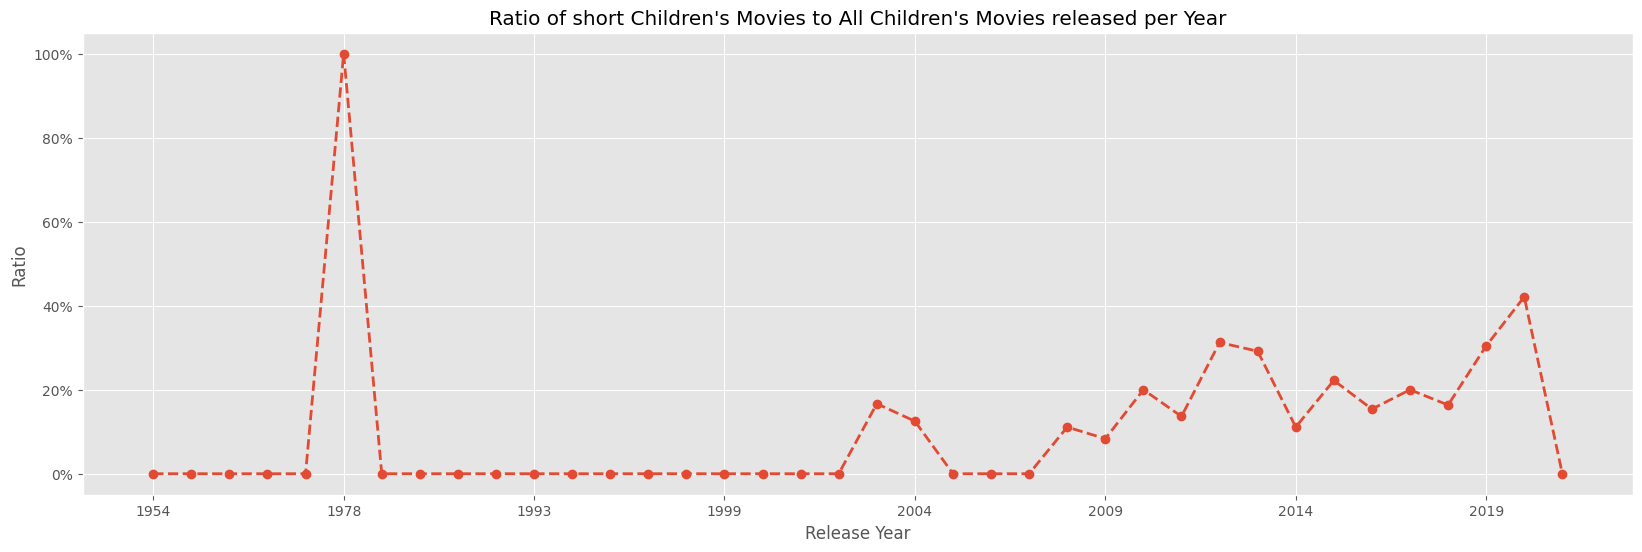

In [230]:
ax = combined_series['Ratio'].plot(figsize=(20,6),lw=2,marker='o',linestyle='--')
ax.set_title("Ratio of short Children's Movies to All Children's Movies released per Year")
ax.set_xlabel("Release Year")
ax.set_ylabel("Ratio")
ax.set_yticklabels("{:.0f}%".format(x) for x in plt.yticks()[0])
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Step 3: Feature Relationships

In [231]:
netflix_movies

,title,country,genre,release_year,duration
show_id,,,,,
s2,7:19,Mexico,Dramas,2016,93
s3,23:59,Singapore,Horror Movies,2011,78
s4,9,United States,Action,2009,80
s5,21,United States,Dramas,2008,123
s7,122,Egypt,Horror Movies,2019,95
...,...,...,...,...,...
s7782,Zoom,United States,Children,2006,88
s7783,Zozo,Sweden,Dramas,2005,99
s7784,Zubaan,India,Dramas,2015,111


In [235]:
colors = netflix_movies['genre'].apply(lambda x: "red" if x == "Documentaries" else ("blue" if x == 'Children' else ("green" if x == 'Stand-Up' else 'purple')))

In [282]:
sorted_dates_netflix_movies = netflix_movies.sort_values(by='release_year',ascending=False)
sorted_dates_netflix_movies

,title,country,genre,release_year,duration
show_id,,,,,
s6671,The Minimalists: Less Is Now,United States,Documentaries,2021,54
s4711,Outside the Wire,NaN,Action,2021,116
s1529,Creating The Queen's Gambit,NaN,Documentaries,2021,14
s7552,What Happened to Mr. Cha?,South Korea,Comedies,2021,102
s1286,Charming,Canada,Children,2021,85
...,...,...,...,...,...
s7680,WWII: Report from the Aleutians,United States,Documentaries,1943,45
s7343,Undercover: How to Operate Behind Enemy Lines,United States,Classic Movies,1943,61
s7617,Why We Fight: The Battle of Russia,United States,Documentaries,1943,82


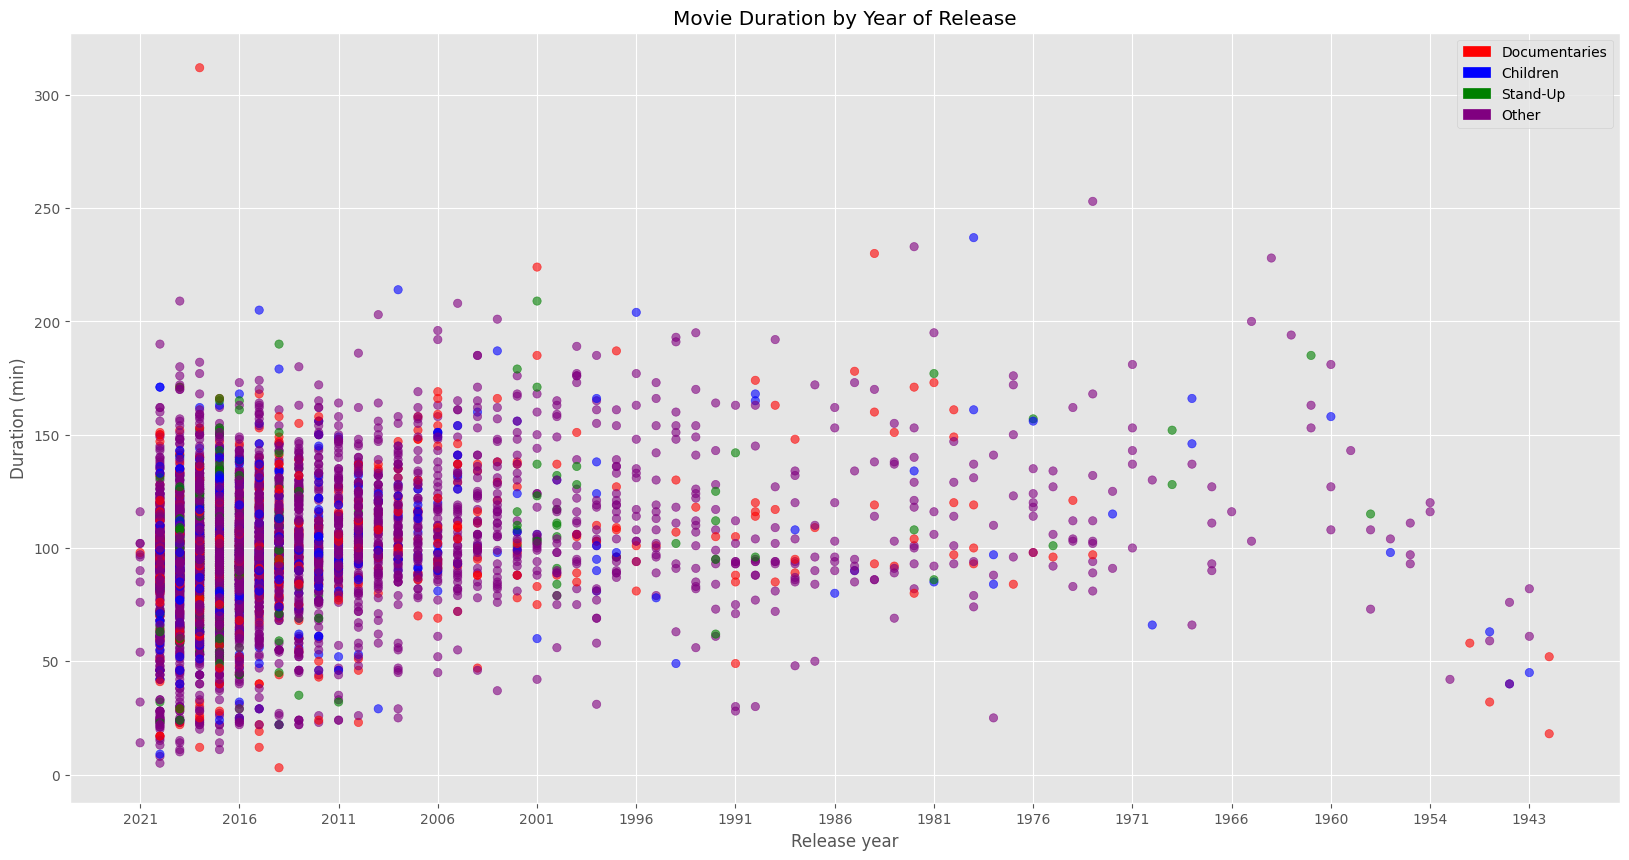

In [300]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(sorted_dates_netflix_movies['release_year'],sorted_dates_netflix_movies['duration'],color=colors,alpha=0.6)
ax.set_xticks(sorted_dates_netflix_movies['release_year'].unique()[::5])
ax.set_xlabel('Release year')
ax.set_ylabel('Duration (min)')
ax.set_title("Movie Duration by Year of Release")
handles = [plt.Rectangle((0,0),1,1,color=color) for color in ['red','blue','green','purple']]
ax.legend(handles=handles, labels=["Documentaries","Children","Stand-Up","Other"])
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Step 4: Ask a question about the data

After inspecting the plot, answer the question "Are we certain that movies are getting shorter?" 

In [302]:
answer = "no"